In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

## prepare data


In [2]:
train = pd.read_excel('./data/insuranceContent/ins_regression_cn_eng.xlsx')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Filename               44 non-null     object 
 1   Words_top500           44 non-null     object 
 2   Text_cleaned           44 non-null     object 
 3   Words                  44 non-null     object 
 4   Words_top100           44 non-null     object 
 5   Words_top10            44 non-null     object 
 6   vectors_Wordstop100    44 non-null     float64
 7   vectors_Wordstop10     44 non-null     float64
 8   vectors_Words_pca      44 non-null     float64
 9   Year                   44 non-null     int64  
 10  Life_Ins               44 non-null     int64  
 11  Property_Ins           44 non-null     int64  
 12  Company_Name           44 non-null     object 
 13  Company_Name_CN_brief  44 non-null     object 
 14  Company_Name_CN        44 non-null     object 
 15  Score_ex

In [3]:
#train['vectors_Wordstop10'] = pd.to_numeric(train['vectors_Wordstop10'], errors='coerce')
#train['vectors_Wordstop100'] = pd.to_numeric(train['vectors_Wordstop100'], errors='coerce')
#train.info()
#train.to_excel('./data/insuranceContent/ins_regression_cn_eng.xlsx', index=False)

In [3]:
train.describe()

,vectors_Wordstop100,vectors_Wordstop10,vectors_Words_pca,Year,Life_Ins,Property_Ins,Score_external,tcfd,esg,Total_Count_Unigram,...,有金控母公司,金控母公司是公股,TCFD_會計師確信,TCFD_BSI查核,溫室氣體驗證,有任第三方驗證,Score_internal,Rank,vectors_Words,vectors_Wordstop500
count,44.000000,44.000000,4.400000e+01,44.0,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,1.763071,-1.672553,5.298792e-17,2022.0,0.477273,0.522727,77.779789,0.590909,0.409091,7070.750000,...,0.363636,0.113636,0.045455,0.090909,0.113636,0.250000,35.167579,22.590909,5.149038,2.207292
std,0.264528,0.106967,6.832828e-01,0.0,0.505258,0.505258,5.953047,0.497350,0.497350,10232.585186,...,0.486607,0.321038,0.210707,0.290803,0.321038,0.438019,13.709608,12.886478,1.283418,0.126516
min,1.634216,-2.040052,-1.646220e+00,2022.0,0.000000,0.000000,64.071429,0.000000,0.000000,561.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,1.000000,1.146583,2.122774
25%,1.666918,-1.695175,-4.469358e-01,2022.0,0.000000,0.000000,74.415179,0.000000,0.000000,2657.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.644535,11.750000,5.318531,2.160718
50%,1.683480,-1.684397,2.800727e-02,2022.0,0.000000,1.000000,77.842262,1.000000,0.000000,4238.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.321162,23.000000,5.530931,2.173343
75%,1.704964,-1.668106,3.910647e-01,2022.0,1.000000,1.000000,81.748512,1.000000,1.000000,7797.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,45.494000,32.250000,5.731945,2.187563
max,2.700280,-1.242533,1.470986e+00,2022.0,1.000000,1.000000,89.291667,1.000000,1.000000,64461.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.875878,44.000000,6.230387,2.700280


In [4]:
train_l= train[(train['Life_Ins']==1)]
train_p= train[(train['Life_Ins']==0)]
train_p

,Filename,Words_top500,Text_cleaned,Words,Words_top100,Words_top10,vectors_Wordstop100,vectors_Wordstop10,vectors_Words_pca,Year,...,金控母公司名稱,金控母公司是公股,TCFD_會計師確信,TCFD_BSI查核,溫室氣體驗證,有任第三方驗證,Score_internal,Rank,vectors_Words,vectors_Wordstop500
21,2022_p_hotai_tcfd,"['治理', '氣候', '治理', '架構', '全球', '氣候變遷', '企業', '...",治理氣候治理架構隨著全球氣候變遷意識上升和泰產險意識到企業正面臨著前所未有的風險與挑戰為確保...,"['治理', '氣候', '治理', '架構', '全球', '氣候變遷', '意識', '...","['治理', '氣候', '治理', '架構', '全球', '氣候變遷', '企業', '...","['氣候', '氣候變遷', '風險', '氣候', '風險', '管理', '氣候變遷',...",1.663165,-1.667082,-1.271603,2022,...,無,0,0,0,0,0,25.959700,33,5.815554,2.178701
22,2022_p_south-china_tcfd,"['氣候', '治理', '極端', '天氣', '氣候變遷', '各國', '政府', '...",氣候治理隨著極端天氣與氣候變遷日漸嚴峻各國政府及企業應更積極思考如何共同抑制全球升溫議題年各...,"['氣候', '治理', '極端', '天氣', '氣候變遷', '日漸', '嚴峻', '...","['氣候', '治理', '氣候變遷', '企業', '全球', '議題', '氣候', '...","['氣候', '氣候變遷', '氣候', '氣候', '氣候變遷', '影響', '氣候',...",1.667855,-1.671871,-0.113321,2022,...,華南金,1,0,0,0,0,57.461256,3,5.615370,2.155071
23,2022_p_fubon_tcfd,"['治理', '氣候', '治理', '架構', '公司', '永續', '經營', '推動...",治理氣候治理架構本公司設有永續經營推動小組依部門性質將公司部門分組成立六大工作小組公司治理及...,"['治理', '氣候', '治理', '架構', '公司', '設有', '永續', '經營...","['治理', '氣候', '治理', '架構', '公司', '永續', '推動', '公司...","['氣候', '公司', '公司', '公司', '氣候變遷', '風險', '相關', '...",1.722028,-1.694294,0.621497,2022,...,富邦金,0,0,0,0,0,40.067344,21,5.276626,2.172286
24,2022_p_CTBC Holding_tcfd,"['治理', '氣候', '治理', '架構', '績效', '考核', '機制', '董事...",四治理氣候治理架構績效考核與薪酬機制董事中信金控董事會績效評估辦法業已明訂績效評估之衡量項目...,"['治理', '氣候', '治理', '架構', '績效', '考核', '薪酬', '機制...","['治理', '氣候', '治理', '架構', '機制', '中信', '金控', '董事...","['氣候', '評估', '公司', '氣候', '評估', '評估', '氣候', '相關...",1.719259,-1.718119,1.470986,2022,...,中信金,0,1,0,0,1,39.164784,19,5.487936,2.171859
25,2022_p_BNP_tcfd,"['氣候', '治理', '監督', '氣候', '治理', '組織', '架構', '分公...",氣候治理與監督氣候治理組織架構與權責本分公司氣候風險管理組織架構包括經理人總經理風險管理委員...,"['氣候', '治理', '監督', '氣候', '治理', '組織', '架構', '權責...","['氣候', '治理', '氣候', '治理', '架構', '分公司', '氣候', '風...","['氣候', '氣候', '氣候', '風險', '管理', '風險', '管理', '風險...",1.658511,-1.665366,-0.621548,2022,...,無,0,0,0,0,0,26.280731,32,5.643857,2.166092
26,2022_p_AIG_tcfd,"['治理', '氣候變遷', '公司', '治理', '公司', '台灣', '分公司', ...",治理氣候變遷與公司治理本公司為之台灣分公司本公司為外國公司之台灣分公司而無設置董事會因此由高...,"['治理', '氣候變遷', '公司', '治理', '公司', '台灣', '分公司', ...","['治理', '氣候變遷', '公司', '治理', '公司', '分公司', '公司', ...","['氣候變遷', '公司', '公司', '公司', '公司', '管理', '風險', '...",1.662367,-1.676413,-0.414798,2022,...,無,0,0,0,0,0,28.412388,29,5.463338,2.185301
27,2022_p_tfmic_tcfd,"['治理', '氣候', '相關', '風險', '機會', '監督', '永續', '發展...",二治理理事會對氣候相關風險與機會監督為使合作社永續發展並考慮本社規模理事會為氣候環境風險管理...,"['治理', '理事', '氣候', '相關', '風險', '機會', '監督', '合作...","['治理', '氣候', '相關', '風險', '機會', '永續', '發展', '氣候...","['氣候', '相關', '風險', '氣候', '風險', '管理', '管理', '氣候...",1.681959,-1.685329,0.380739,2022,...,無,0,0,0,0,0,12.916417,42,4.687719,2.175232
28,2022_p_chubb_tcfd,"['分公司', '安達', '集團', '監督', '營運', '法人', '實體', '風...",安達產險臺灣分公司作為在安達集團監督下營運的當地法人實體設有地方風險管理委員會即委員會負責實...,"['安達產險', '分公司', '安達', '集團', '監督', '營運', '法人', ...","['分公司', '集團', '營運', '實體', '風險', '管理', '委員會', '...","['風險', '管理', '氣候', '風險', '管理', '風險', '管理', '風險...",1.695063,-1.660102,0.351846,2022,...,無,0,0,0,0,0,14.093361,40,5.188644,2.187475
29,2022_p_taian_tcfd,"['氣候', '治理', '架構', '公司', '氣候變遷', '風險', '管理', '...",氣候治理架構本公司氣候變遷風險管理辦法於年底經董事會審議通過另本報告書將於每年依法規規定時程...,"['氣候', '治理', '架構', '公司', '氣候變遷', '風險', '管理', '...","['氣候', '治理', '架構', '公司', '氣候變遷', '風險', '管理', '...","['氣候', '公司', '氣候變遷', '風險', '管理', '公司', '氣候', '...",1.713531,-1.690848,0.477879,2022,...,無,0,0,0,0,0,45.466892,12,5.439302,2.187604
30,2022_p_cathay_esg,"['氣候', '治理', '國泰產險', '氣候變遷', '治理', '架構', '氣候',...",氣候治理國泰產險氣候變遷治理架構對於氣候相關風險與機會之治理國泰產險以低碳永續經營為目標由董...,"['氣候', '治理', '國泰產險', '氣候變遷', '治理', '架構', '氣候',...","['氣候', '治理', '氣候變遷', '治理', '架構', '氣候', '相關', '...","['氣候', '氣候變遷', '氣候', '相關', '風險', '管理', '氣候', '...",1.686766,-1.677268,-0.047503,2022,...,國泰金,0,0,0,0,0,55.992481,1,5.529265,2.122774


In [6]:
#import matplotlib.pyplot as plt

## 數值型變數的基本描述
#numeric_cols = train_p.select_dtypes(include=['float64', 'int64'])

#numeric_cols.hist(figsize=(20, 15), bins=30, edgecolor='black')
#plt.tight_layout()
#plt.show()

## Do not execute! Save 500 times train-val indices

In [9]:
# 重新設定 train_p 的索引
train_p = train_p.reset_index(drop=True)

In [10]:
X = train_p.drop(columns=['Score_internal', 'Score_external','Rank',
                        'Filename', 'Year', 'Company_Name', 'Life_Ins', 'Property_Ins', 'Company_Name_CN_brief', 'Company_Name_CN', '金控母公司名稱',
                        'Text_cleaned','Text_uncleaned', 'Words', 'Words_top10', 'Words_top100', 'Words_top500' 
])   

y= train_p['Score_external']

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vectors_Wordstop100  23 non-null     float64
 1   vectors_Wordstop10   23 non-null     float64
 2   vectors_Words_pca    23 non-null     float64
 3   tcfd                 23 non-null     int64  
 4   esg                  23 non-null     int64  
 5   Total_Count_Unigram  23 non-null     int64  
 6   Different_Unigrams   23 non-null     int64  
 7   TTR_Unigram500       23 non-null     int64  
 8   TTR_Unigram1000      23 non-null     int64  
 9   TTR_Unigram2000      23 non-null     int64  
 10  TTR_Unigram3000      23 non-null     int64  
 11  TTR_Unigram4000      23 non-null     int64  
 12  TTR_Unigram5000      23 non-null     int64  
 13  Entropy_Unigram500   23 non-null     float64
 14  Entropy_Unigram1000  23 non-null     float64
 15  Entropy_Unigram2000  23 non-null     float

In [13]:
train_val_indices = {
    'train_indices': [],
    'val_indices': []
}

numTrials = 500
train_sample = 0
val_sample = 0
traindistribution = 0
valdistribution = 0

for i in range(numTrials):
    # 保存訓練和驗證集的索引
    # 使用train_test_split來切分資料，但只記錄索引，去掉stratify參數
    X_train_indices, X_val_indices, _, _ = train_test_split(np.arange(len(X)), y, test_size=0.2, random_state=None)
    print(f'Train indices_{i}:{X_train_indices},Val indices_{i}:{X_val_indices}')
    train_val_indices['train_indices'].append(X_train_indices.tolist())
    train_val_indices['val_indices'].append(X_val_indices.tolist())
    # Get train/val set y distribution stats 
    traindistribution += pd.Series(y[X_train_indices]).describe()
    valdistribution += pd.Series(y[X_val_indices]).describe()
    train_sample += len(X_train_indices)
    val_sample += len(X_val_indices)
## 保存切分索引
np.save('train_val_indices_regression_property_simulation500.npy', train_val_indices, allow_pickle=True)

print(f"Train sample:{train_sample}\nVal sample:{val_sample}")
print(f"Train distribution:\n{traindistribution/numTrials}\nVal distribution:\n{valdistribution/numTrials}")

Train indices_0:[22 10  0 20 12  6 18  5 11 19  2  1 15  7 14  8 16 21],Val indices_0:[ 9 13  3 17  4]
Train indices_1:[11 10  1 14 18 21  3  7 17 16 20 12  8 22 13  9  0 15],Val indices_1:[ 6 19  2  4  5]
Train indices_2:[11  9  1  4  3  2 20 22  8  0 10 15 12 16  7 14  5  6],Val indices_2:[17 13 21 18 19]
Train indices_3:[16 11  0  5 20  9 15 22 19 17  7  8 21  1 12 14 10  3],Val indices_3:[ 2  6 13  4 18]
Train indices_4:[17  3 10 13 21 11  1  5  0 12 22 14 18 20 15  7 16  8],Val indices_4:[ 4  6 19  9  2]
Train indices_5:[ 0 21 17 19  2 14 13 15  4  7  1  5  8 20 11 18 10 16],Val indices_5:[22  9  6  3 12]
Train indices_6:[ 8 16 17 10  0  3  5 15 19  7 12 13 20 18 22  4  6 11],Val indices_6:[ 9 21  2  1 14]
Train indices_7:[ 1 16 13 22 21 10  2 20  0 14  6  4 17  8  5  7  9 15],Val indices_7:[18 19 12  3 11]
Train indices_8:[ 1 19  6  0 22 18  8  5  7 17 21 15 20 11  2 10 16 12],Val indices_8:[ 3 13  4 14  9]
Train indices_9:[ 4 22 18 17  6  9 15  7 10 11  1  3  5 19 21 20  8 13],V

In [14]:
# 檢查數據類型和內容
print(f"train_valt_indices type: {type(train_val_indices)}")
print('===1/500 sampling===')
print(f"{len(train_val_indices['train_indices'][0])} Train indices for the first sampling(1/500): {train_val_indices['train_indices'][0]}")
print(f"{len(train_val_indices['val_indices'][0])} Val indices for the first sampling(1/500): {train_val_indices['val_indices'][0]}")

train_valt_indices type: <class 'dict'>
===1/500 sampling===
18 Train indices for the first sampling(1/500): [22, 10, 0, 20, 12, 6, 18, 5, 11, 19, 2, 1, 15, 7, 14, 8, 16, 21]
5 Val indices for the first sampling(1/500): [9, 13, 3, 17, 4]


In [15]:
# 檢查有哪些鍵存在於 train_test_indices 中
print("Available keys:", train_val_indices.keys())

Available keys: dict_keys(['train_indices', 'val_indices'])


## Use saved indices to cross validation

# Project process
1. 標準化 X
2. 在 train set 上進行 模擬100次 交叉驗證
    * train loss, val loss
3. 無 test set

##  prepare variables

In [12]:
## 重新設定 train_p 的索引
#train_p = train_p.reset_index(drop=True)

In [34]:
X_all = train_p.drop(columns=['Score_internal', 'Score_external','Rank',
                        'Filename', 'Year', 'Company_Name', 'Life_Ins', 'Property_Ins', 'Company_Name_CN_brief', 'Company_Name_CN', '金控母公司名稱',
                        'Text_cleaned','Text_uncleaned', 'Words', 'Words_top10', 'Words_top100', 'Words_top500' 
                     ])
X_ols = train_p[['vectors_Words','TTR_Bigram500', 'Total_Count_Bigram', '有金控母公司']]
y = train_p['Score_internal']

In [ ]:
#X_ols = train_p[['vectors_Words','TTR_Bigram500', 'Different_Bigrams', '有金控母公司']]

#y = train_p['Score_external']

In [35]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vectors_Wordstop100  23 non-null     float64
 1   vectors_Wordstop10   23 non-null     float64
 2   vectors_Words_pca    23 non-null     float64
 3   tcfd                 23 non-null     int64  
 4   esg                  23 non-null     int64  
 5   Total_Count_Unigram  23 non-null     int64  
 6   Different_Unigrams   23 non-null     int64  
 7   TTR_Unigram500       23 non-null     int64  
 8   TTR_Unigram1000      23 non-null     int64  
 9   TTR_Unigram2000      23 non-null     int64  
 10  TTR_Unigram3000      23 non-null     int64  
 11  TTR_Unigram4000      23 non-null     int64  
 12  TTR_Unigram5000      23 non-null     int64  
 13  Entropy_Unigram500   23 non-null     float64
 14  Entropy_Unigram1000  23 non-null     float64
 15  Entropy_Unigram2000  23 non-null     float

##  X Standardization

In [36]:
# X Standardization
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_all_scaled = scaler.fit_transform(X_all)
X_ols_scaled = scaler.fit_transform(X_ols)

## Run simulations and Calculate RMSE stats

In [22]:
def train_and_evaluate(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    
    # 訓練集預測和 RMSE
    train_predictions = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    
    # 驗證集預測和 RMSE
    val_predictions = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))

    return train_rmse, val_rmse

In [23]:
def run_simulation(X_scaled, y, train_val_indices, models, numTrial=100):
    rmse_dict = {model_name: {'train_rmse': [], 'val_rmse': []} for model_name in models}

    # 進行100次訓練和驗證
    for i, (X_train_indices, X_val_indices) in enumerate(zip(train_val_indices['train_indices'], train_val_indices['val_indices'])):
        X_train = X_scaled[X_train_indices]
        X_val = X_scaled[X_val_indices]
        y_train = y.iloc[X_train_indices]
        y_val = y.iloc[X_val_indices]

        for model_name, model in models.items():
            train_rmse, val_rmse = train_and_evaluate(model, X_train, X_val, y_train, y_val)
            rmse_dict[model_name]['train_rmse'].append(train_rmse)
            rmse_dict[model_name]['val_rmse'].append(val_rmse)

    return rmse_dict

In [24]:
def calculate_rmse_stats(rmse_dict, model_name):
    model_name_map = {
    'Linear Regression': 'LR',
    'Ridge' : 'ridge',
    'Lasso' : 'lasso',
    'Decision Tree': 'DT',
    'Random Forest': 'RF',
    'XGBoost': 'XGB',
    'SVM': 'SVM'
}
    avg_train_rmse = np.mean(rmse_dict['train_rmse'])
    std_train_rmse = np.std(rmse_dict['train_rmse'])
    avg_val_rmse = np.mean(rmse_dict['val_rmse'])
    std_val_rmse = np.std(rmse_dict['val_rmse'])


    model_name_abb = model_name_map[model_name]
    print(f'{model_name_abb}: trainRMSE: {avg_train_rmse:.2f}, trainSD: {std_train_rmse:.2f}, '
          f'valRMSE: {avg_val_rmse:.2f}, valSD: {std_val_rmse:.2f}')
    return [avg_train_rmse, std_train_rmse, avg_val_rmse, std_val_rmse]

In [25]:
from sklearn.model_selection import GridSearchCV

# 定義 Random Forest 參數網格
param_grid_rf = {
    'n_estimators': [50, 100, 200],#決策樹的個數, 300
    'max_depth': [1, 2, 5],#樹的最大深度, None
    'min_samples_split': [5, 10, 15],#節點中需要的最小樣本數，至少有 2、5 或 10 個樣本時才能繼續分裂
    'min_samples_leaf': [1, 5, 10],   # Minimum samples per leaf
}

# 定義 SVM 參數網格
param_grid_svm = {
    'C': [0.1, 1, 10],#正則化參數[0.1, 1, 10, 100]
    'kernel': ['linear', 'rbf', 'poly'],#核函數線性核（linear）和非線性核（rbf）['linear', 'rbf', 'poly']
    'gamma': ['scale', 'auto']#rbf的作用範圍
}

# 定義 XGB 參數網格
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # 樹的數量
    #'learning_rate': [0.01, 0.05, 0.1],  # 學習率
    'max_depth': [1, 3, 5, 7],  # 樹的最大深度
    #'subsample': [0.7, 0.8, 1.0],  # 每棵樹用的數據比例
    #'colsample_bytree': [0.7, 0.8, 1.0],  # 每棵樹使用的特徵比例
    'reg_alpha': [0, 0.01, 0.05],  # L1 正則化
    'reg_lambda': [1.5, 2, 2.5]  # L2 正則化
}

# 使用 GridSearchCV 找到最佳的參數
def grid_search_rf(X_train, y_train):
    print("Running Grid Search for Random Forest...")
    rf_model = RandomForestRegressor(random_state=42)
    grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)
    grid_search_rf.fit(X_train, y_train)
    print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
    best_rf = RandomForestRegressor(random_state=42, **grid_search_rf.best_params_)
    return best_rf # 返回最佳模型

def grid_search_svm(X_train, y_train):
    print("Running Grid Search for SVM...")
    svm_model = SVR()
    grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='neg_mean_squared_error', cv=5)
    grid_search_svm.fit(X_train, y_train)
    print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
    best_svm = SVR(**grid_search_svm.best_params_)# SVR 沒有 random_state
    return best_svm  # 返回最佳模型

def grid_search_xgb(X_train, y_train):
    print("Running Grid Search for XGBoost...")
    xgb_model = XGBRegressor(random_state=42)
    grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
    grid_search_xgb.fit(X_train, y_train)
    print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
    best_xgb = XGBRegressor(random_state=42, **grid_search_xgb.best_params_)
    return best_xgb  # 返回最佳模型

In [26]:
# 加載之前存儲的資料切分索引
train_val_indices = np.load('train_val_indices_regression_property_simulation500.npy', allow_pickle=True).item()
print(len(train_val_indices['train_indices']))

500


In [38]:
# 執行 Random Forest 和 SVM 的 Grid Search 並保存最佳參數的模型
best_rf = grid_search_rf(X_all_scaled, y)
best_svm = grid_search_svm(X_all_scaled, y)
best_xgb = grid_search_xgb(X_all_scaled, y)
# 定義模型，使用找到的最佳參數進行訓練
models = {
    #'Linear Regression': LinearRegression(),
    #'Decision Tree': DecisionTreeRegressor(random_state=42),
    #'Ridge' : Ridge(alpha=1.0),
    'Lasso' : Lasso(alpha=0.1),
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'SVM': best_svm
}

# 執行模擬
rmse_dict_all = run_simulation(X_all_scaled, y, train_val_indices, models)
rmse_dict_ols = run_simulation(X_ols_scaled, y, train_val_indices, models)
print(rmse_dict_all)
print(rmse_dict_ols)

Running Grid Search for Random Forest...
Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Running Grid Search for SVM...
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Running Grid Search for XGBoost...
Best Parameters for XGBoost: {'max_depth': 1, 'n_estimators': 100, 'reg_alpha': 0.01, 'reg_lambda': 2.5}


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.698e-01, tolerance: 3.621e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.281e+00, tolerance: 3.797e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+00, tolerance: 

{'Lasso': {'train_rmse': [4.68377809971554, 4.716158336112209, 5.036283580799141, 4.546580467590622, 4.947482300377023, 5.2235709829203305, 5.486262432302163, 4.9274275330744866, 5.325153289854466, 4.771221453606053, 2.314117037070515, 4.619522777062213, 3.2818397195744553, 4.987360922724972, 5.110837788462349, 4.8309696381776, 3.1791180038928117, 4.596606290514536, 5.607544847291958, 5.0127032698070275, 2.8519965679322894, 5.247740786063648, 5.185549205119762, 5.095250415903141, 5.414271375557995, 3.0399584694027086, 4.99945995686124, 4.844953568687219, 2.5972491803115934, 4.889043633769173, 4.7253555513685335, 5.342584797033365, 4.601540607890532, 5.350994491823915, 4.765655656909975, 4.715284194792204, 5.469440158879379, 3.053738895739815, 4.723622574909664, 5.033528261613092, 2.4420829902567482, 2.129028234467736, 5.500620667806624, 3.554247359751034, 5.557523271422052, 4.309214467448669, 3.4061603897415935, 5.464647491668404, 5.063003316461406, 1.7133744760560103, 2.90192669399883

In [39]:
print('===all===')
rmse_summary_all = {model_name: calculate_rmse_stats(rmse_dict_all[model_name], model_name) for model_name in models}
print('===ols===')
rmse_summary_ols = {model_name: calculate_rmse_stats(rmse_dict_ols[model_name], model_name) for model_name in models}

===all===
lasso: trainRMSE: 4.33, trainSD: 0.97, valRMSE: 12.97, valSD: 3.42
RF: trainRMSE: 5.70, trainSD: 0.44, valRMSE: 11.95, valSD: 2.43
XGB: trainRMSE: 1.07, trainSD: 0.24, valRMSE: 12.92, valSD: 2.56
SVM: trainRMSE: 6.05, trainSD: 0.89, valRMSE: 11.81, valSD: 3.07
===ols===
lasso: trainRMSE: 7.99, trainSD: 0.55, valRMSE: 10.54, valSD: 2.42
RF: trainRMSE: 6.63, trainSD: 0.44, valRMSE: 11.90, valSD: 2.79
XGB: trainRMSE: 2.98, trainSD: 0.46, valRMSE: 11.26, valSD: 2.45
SVM: trainRMSE: 10.61, trainSD: 0.80, valRMSE: 11.92, valSD: 3.47


## Visualization
### Compare models

In [40]:
# 構造數據框以繪製箱型圖
def prepare_boxplot_data(rmse_dict_all, rmse_dict_ols):
    model_names = []
    rmse_values = []
    dataset_types = []  # 'train' or 'val'
    feature_sets = []  # 'All Features' or 'OLS'

    for model_name in rmse_dict_all:
        # All Features Train RMSE
        model_names.extend([model_name] * len(rmse_dict_all[model_name]['train_rmse']))
        rmse_values.extend(rmse_dict_all[model_name]['train_rmse'])
        dataset_types.extend(['train'] * len(rmse_dict_all[model_name]['train_rmse']))
        feature_sets.extend(['All Features'] * len(rmse_dict_all[model_name]['train_rmse']))

        # All Features Validation RMSE
        model_names.extend([model_name] * len(rmse_dict_all[model_name]['val_rmse']))
        rmse_values.extend(rmse_dict_all[model_name]['val_rmse'])
        dataset_types.extend(['val'] * len(rmse_dict_all[model_name]['val_rmse']))
        feature_sets.extend(['All Features'] * len(rmse_dict_all[model_name]['val_rmse']))

        # OLS Train RMSE
        model_names.extend([model_name] * len(rmse_dict_ols[model_name]['train_rmse']))
        rmse_values.extend(rmse_dict_ols[model_name]['train_rmse'])
        dataset_types.extend(['train'] * len(rmse_dict_ols[model_name]['train_rmse']))
        feature_sets.extend(['Proposed'] * len(rmse_dict_ols[model_name]['train_rmse']))

        # OLS Validation RMSE
        model_names.extend([model_name] * len(rmse_dict_ols[model_name]['val_rmse']))
        rmse_values.extend(rmse_dict_ols[model_name]['val_rmse'])
        dataset_types.extend(['val'] * len(rmse_dict_ols[model_name]['val_rmse']))
        feature_sets.extend(['Proposed'] * len(rmse_dict_ols[model_name]['val_rmse']))

    # 將數據轉換為 DataFrame
    boxplot_data = pd.DataFrame({
        'Model': model_names,
        'RMSE': rmse_values,
        'Dataset': dataset_types,
        'Feature Set': feature_sets
    })
    
    return boxplot_data

In [41]:
prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)

,Model,RMSE,Dataset,Feature Set
0,Lasso,4.683778,train,All Features
1,Lasso,4.716158,train,All Features
2,Lasso,5.036284,train,All Features
3,Lasso,4.546580,train,All Features
4,Lasso,4.947482,train,All Features
...,...,...,...,...
7995,SVM,9.831534,val,Proposed
7996,SVM,12.892351,val,Proposed
7997,SVM,12.911860,val,Proposed
7998,SVM,17.176976,val,Proposed


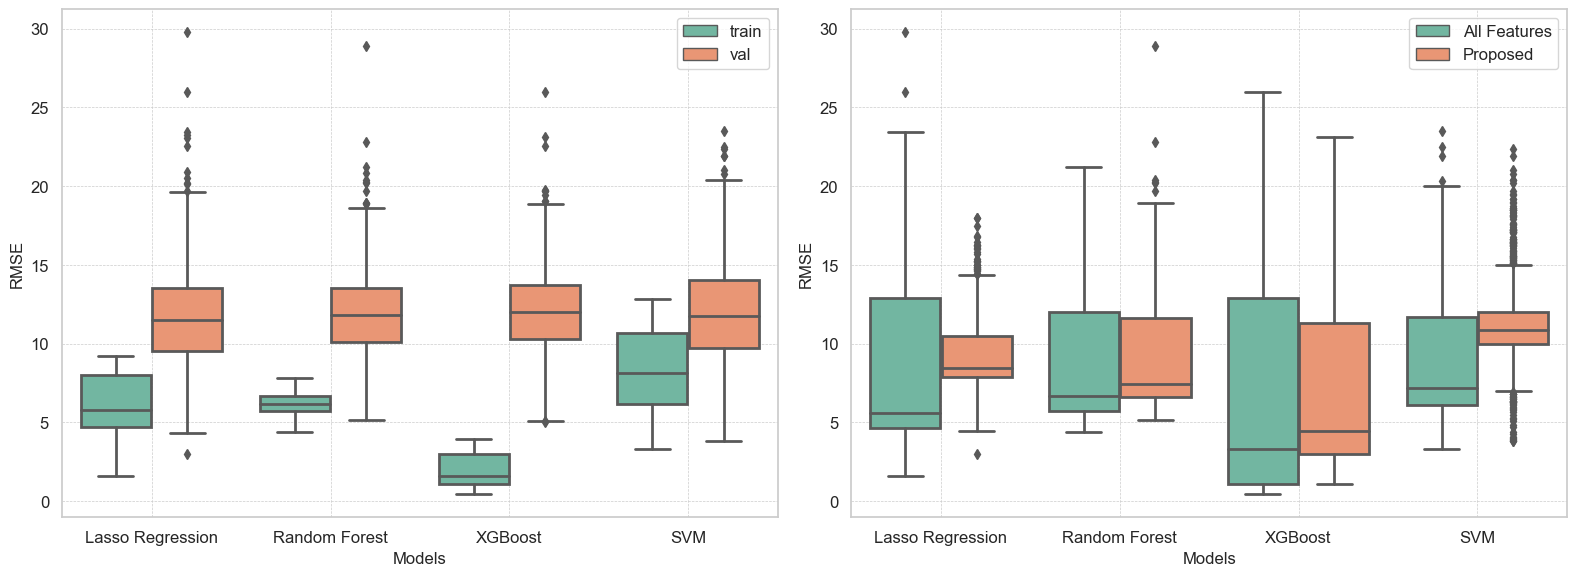

In [42]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Lasso Regression'})
    
    fig, axs = plt.subplots(1,2,figsize=(16, 6))
    # Set general style
    sns.set(style="whitegrid", font_scale=1.2)  # Scale font size
    
    # Draw the first boxplot with 'Dataset' (train/val) as the hue
    sns.boxplot(ax=axs[0], x='Model', y='RMSE', hue='Dataset', data=data, palette='Set2', linewidth=2)
    #axs[0].set_title('RMSE by Dataset', fontsize=16)
    axs[0].set_xlabel('Models', fontsize=12)
    axs[0].set_ylabel('RMSE', fontsize=12)
    axs[0].legend(fontsize=12, loc='upper right')

    # Draw the second boxplot with 'Feature Set' (All Features/Proposed) as the hue
    sns.boxplot(ax=axs[1], x='Model', y='RMSE', hue='Feature Set', data=data, palette='Set2', linewidth=2)
    #axs[1].set_title('RMSE by Feature Set', fontsize=16)
    axs[1].set_xlabel('Models', fontsize=12)
    axs[1].set_ylabel('RMSE', fontsize=12)
    axs[1].legend(fontsize=12, loc='upper right')

    # Add grid and adjust tick params for all subplots
    for ax in axs.flat:
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Adjust subplot spacing
    plt.subplots_adjust(wspace=0.1, hspace=0.5, left=0.1, right=0.9)  # Adjust subplot layout

    # Save figure
    #plt.savefig('all54_vs_proposed4_property_external_model.png', dpi=1000, bbox_inches='tight')
    plt.savefig('all54_vs_proposed4_property_internal_model.png', dpi=1000, bbox_inches='tight')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


# 調用函數來繪製 boxplot
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)

#### Combined

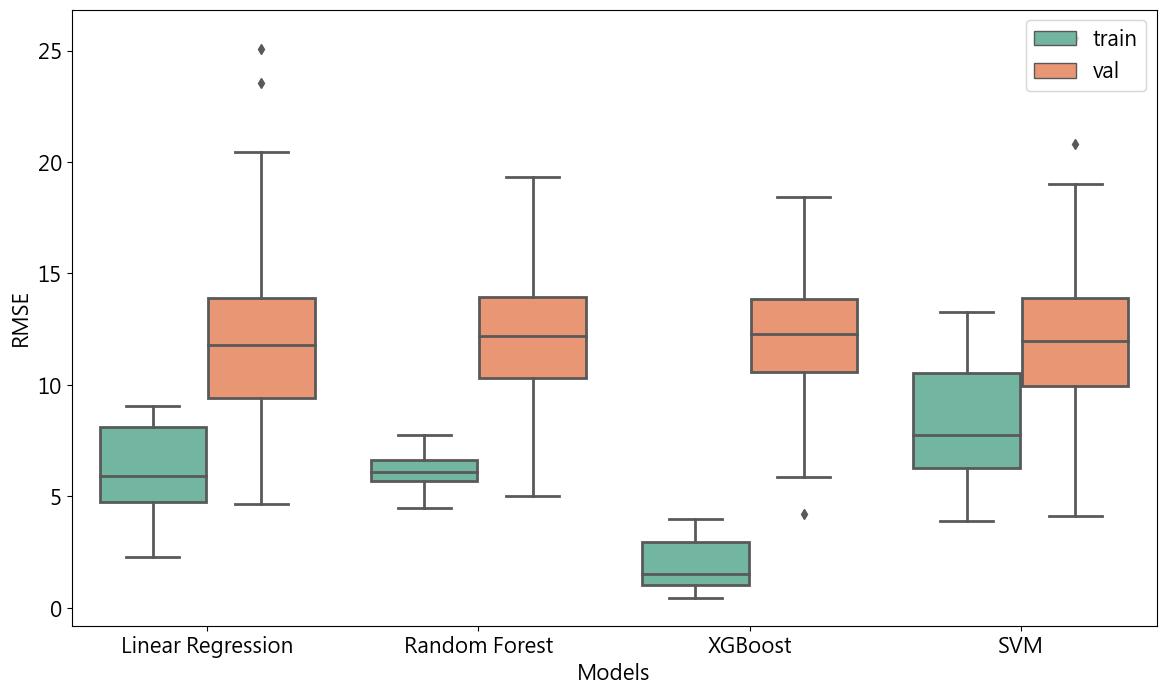

In [34]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Linear Regression'})
    plt.figure(figsize=(14, 8))
    
    # Draw a boxplot with 'Dataset' (train/val) as the hue
    sns.boxplot(x='Model', y='RMSE', hue='Dataset', data=data, palette='Set2', linewidth=2)
    
    #plt.title('RMSE Comparison Across Models', fontsize=16)
    plt.xlabel('Models', fontsize=15)
    plt.ylabel('RMSE', fontsize=15)
    plt.xticks(fontsize = 15)#rotation=45, 
    plt.yticks(fontsize = 15)
    plt.legend(fontsize=15, loc='upper right')
    
    plt.show()
# 調用函數來繪製 boxplot
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)

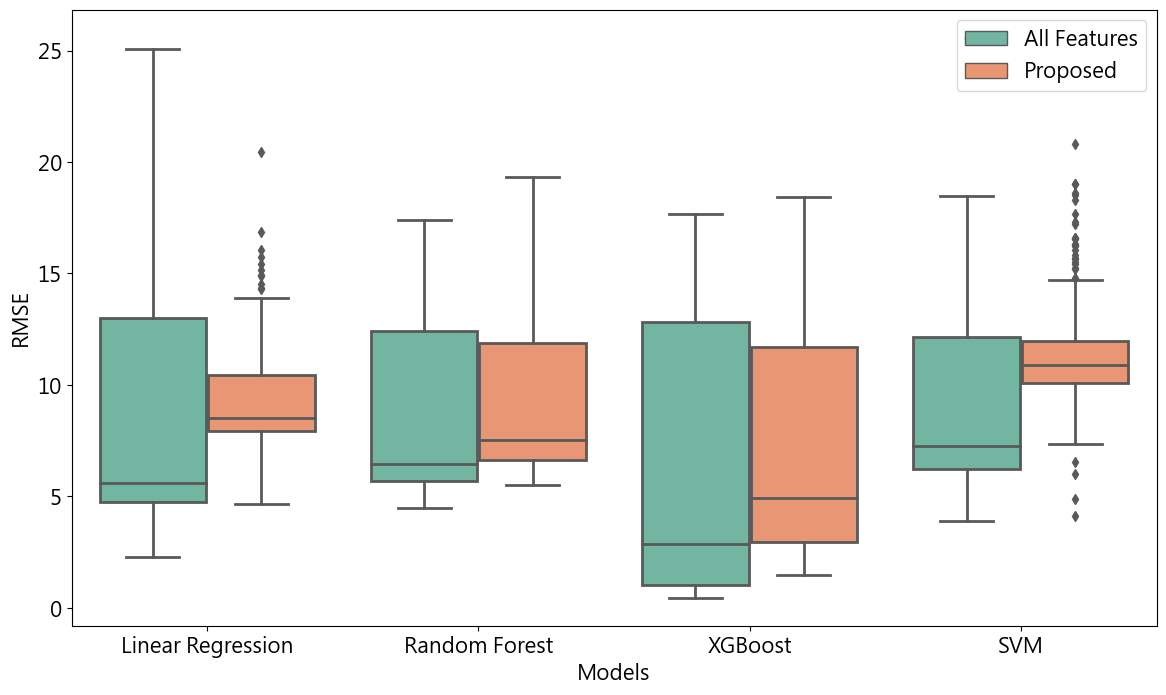

In [35]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Linear Regression'})
    plt.figure(figsize=(14, 8))
    
    # Draw a boxplot with 'Dataset' (train/val) as the hue
    sns.boxplot(x='Model', y='RMSE', hue='Feature Set', data=data, palette='Set2', linewidth=2)
    
    #plt.title('RMSE Comparison Across Feature Sets', fontsize=16)
    plt.xlabel('Models', fontsize=15)
    plt.ylabel('RMSE', fontsize=15)
    plt.xticks(fontsize = 15)#rotation=45, 
    plt.yticks(fontsize = 15)
    plt.legend( fontsize=15, loc='upper right')
    #title='Dataset', title_fontsize=15,
    plt.show()

# 調用函數來繪製 boxplot
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)

## Compare features and models

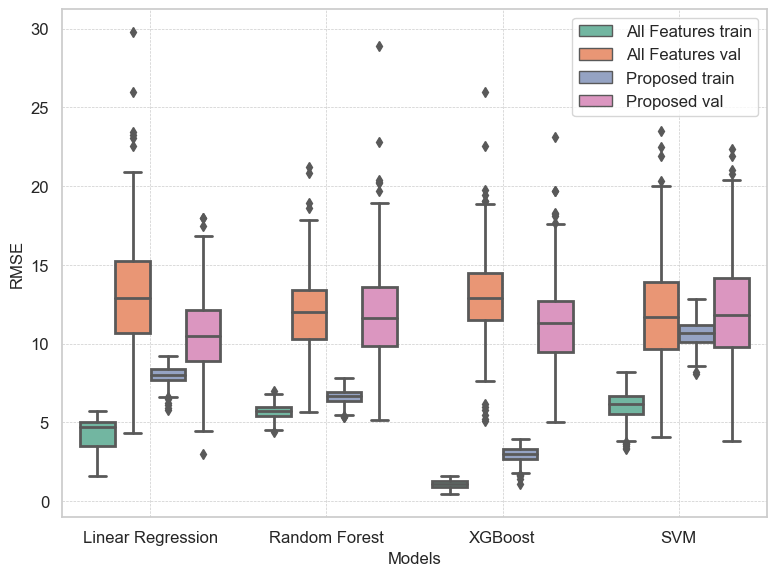

In [43]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Linear Regression'})
    
    # Combine Dataset and Feature Set into a single column to create distinct categories for boxplots
    data['Feature_Dataset'] = data['Feature Set'] + ' ' + data['Dataset']
    
    plt.figure(figsize=(8, 6))#14, 8
    sns.set(style="whitegrid", font_scale=1.2)  # Scale font size
    
    # Draw a boxplot with combined 'Feature Set' and 'Dataset' for x-axis grouping
    sns.boxplot(x='Model', y='RMSE', hue='Feature_Dataset', data=data, palette='Set2', linewidth=2)
    # Add gridlines
    plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, axis='both')
    
    #plt.title('RMSE Comparison Across Models and Feature Sets', fontsize=16)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.legend(fontsize=12, loc='upper right')

    # Save figure
    #plt.savefig('all54_vs_proposed4_property_external_model&feature.png', dpi=1000, bbox_inches='tight')
    plt.savefig('all54_vs_proposed4_property_internal_model&feature.png', dpi=1000, bbox_inches='tight')
   
    # Adjust layout and display the plot
    plt.tight_layout()    
    plt.show()

# Call the function to plot the boxplot comparison
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)

## Compare features

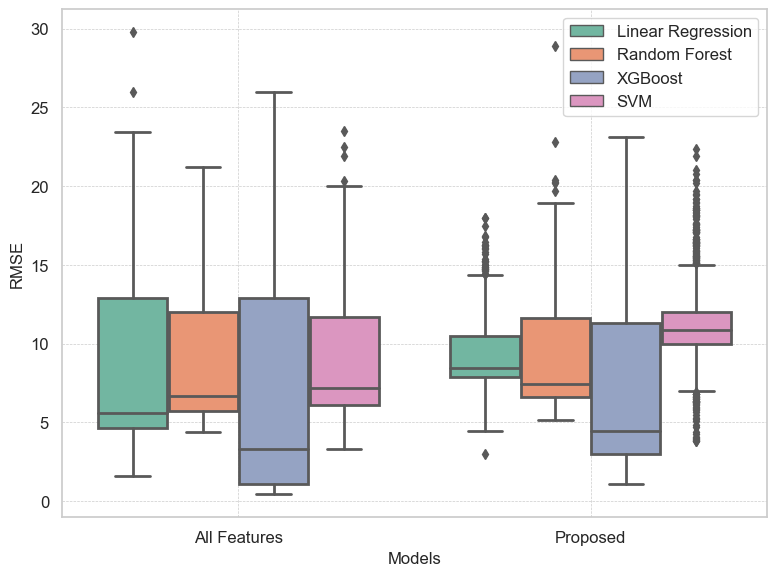

In [44]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Linear Regression'})
    
    # Combine Dataset and Feature Set into a single column to create distinct categories for boxplots
    data['Feature_Dataset'] = data['Feature Set'] + ' ' + data['Dataset']
    
    plt.figure(figsize=(8, 6))#14, 8
    sns.set(style="whitegrid", font_scale=1.2)  # Scale font size
       
    # Draw a boxplot with combined 'Feature Set' and 'Dataset' for x-axis grouping
    sns.boxplot(x='Feature Set', y='RMSE', hue='Model', data=data, palette='Set2', linewidth=2)
    # Add gridlines
    plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, axis='both')
     
    #plt.title('RMSE Comparison Across Models and Feature Sets', fontsize=16)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.xticks(fontsize = 12) 
    plt.yticks(fontsize = 12)
    plt.legend(fontsize=12, loc='upper right')

    # Save figure
    #plt.savefig('all54_vs_proposed4_property_external_feature.png', dpi=1000, bbox_inches='tight')
    plt.savefig('all54_vs_proposed4_property_internal_feature.png', dpi=1000, bbox_inches='tight')
   
    # Adjust layout and display the plot
    plt.tight_layout()     
    plt.show()

# Call the function to plot the boxplot comparison
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)